In [1]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 114.2 MB/s eta 0:00:00


In [3]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 55.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 37.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.0/266.0 KB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 35.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.33.0-py3-none-any.whl size=25313831 sha256

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import ktrain
from ktrain import text

In [5]:
data_train = pd.read_csv('/content/drive/MyDrive/waterQuality/all4classes.csv')
data_train.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,body,Subjectivity,Polarity,Analysis,cod
0,0,0,0,predatory white pointers dingos saltwatercrocs...,0.075066,0.075066,Positive,0
1,1,1,1,this january simply note that are still having...,0.000000,0.000000,Neutral,0
2,2,2,2,pronouns hehim height zodiac sign leo smoke he...,0.000000,0.000000,Neutral,0
3,3,3,3,pronouns hehim height zodiac sign sagittarius ...,-0.075000,-0.075000,Negative,0
4,4,4,4,hoses are inchworm water lilies are powderblue...,-0.166667,-0.166667,Negative,0


In [6]:
data_train.rename(columns={"class": "analysis"}, inplace = True)

In [7]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"] = "0";

In [8]:
import pandas as pd
import numpy as np

import tensorflow as tf

import matplotlib.pyplot as plt

from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras import losses

from tensorflow.keras.metrics import AUC

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, matthews_corrcoef, roc_curve, auc, roc_auc_score


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [9]:
# splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(data_train['body'],\
                                                      data_train['cod'],\
                                                      test_size=0.2,\
                                                      random_state=0)

In [10]:
len(X_train), len(X_test)

(15859, 3965)

In [11]:
# Building model with transformer
model_name = 'roberta-base'

trans = text.Transformer(model_name, maxlen=128)

In [12]:
# consider 30k comments
num_words = 30000

# convert texts to number format - for tensorflow.

tokenizer = Tokenizer(num_words=num_words,oov_token="unk")
tokenizer.fit_on_texts(data_train['body'].values.astype(str).tolist())

print(str(tokenizer.texts_to_sequences(['this is a test'])))

[[11, 1, 1, 667]]


In [13]:
# text-to-number
x_train = np.array( tokenizer.texts_to_sequences(X_train.values.astype(str)) )
x_test  = np.array( tokenizer.texts_to_sequences(X_test.values.astype(str)) )

<ipython-input-13-52717cdf9361>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train = np.array( tokenizer.texts_to_sequences(X_train.values.astype(str)) )
<ipython-input-13-52717cdf9361>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test  = np.array( tokenizer.texts_to_sequences(X_test.values.astype(str)) )


In [14]:
x_train = pad_sequences(x_train, padding='post', maxlen=128)
x_test = pad_sequences(x_test, padding='post', maxlen=128)

In [15]:
X_train = X_train.values.astype(str).tolist()
y_train = y_train.values.astype(str).tolist()

X_test = X_test.values.astype(str).tolist()
y_test = y_test.values.astype(str).tolist()


In [16]:
train_data = trans.preprocess_train(X_train, y_train)
test_data = trans.preprocess_test(X_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 23
	95percentile : 41
	99percentile : 44


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 23
	95percentile : 41
	99percentile : 44


In [17]:
# getting roberta-base model.
model = trans.get_classifier()

In [18]:
learner = ktrain.get_learner(model, train_data = train_data, val_data = test_data, batch_size = 32)

simulating training for different learning rates... this may take a few moments...
Epoch 1/5
495/495 [==============================] - 395s 792ms/step - loss: 0.3540 - accuracy: 0.8612
Epoch 2/5
495/495 [==============================] - 395s 799ms/step - loss: 0.3818 - accuracy: 0.8526
Epoch 3/5
495/495 [==============================] - 395s 797ms/step - loss: 1.0729 - accuracy: 0.4656
Epoch 4/5
495/495 [==============================] - 30s 60ms/step - loss: 1.4054 - accuracy: 0.2313


/usr/local/lib/python3.8/dist-packages/ktrain/lroptimize/lrfinder.py:267: UserWarning: Shape of array too small to calculate a numerical gradient, at least (edge_order + 1) elements are required.
  warnings.warn(str(e))




done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


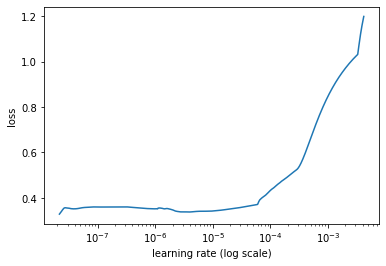

In [24]:
learner.lr_find(start_lr=2e-08, max_epochs=5)
learner.lr_plot()

In [25]:
history = learner.autofit(2e-8, 4)



begin training using triangular learning rate policy with max lr of 2e-08...
Epoch 1/4
496/496 [==============================] - 443s 852ms/step - loss: 0.3542 - accuracy: 0.8605 - val_loss: 0.4349 - val_accuracy: 0.8330
Epoch 2/4
496/496 [==============================] - 422s 845ms/step - loss: 0.3498 - accuracy: 0.8619 - val_loss: 0.4351 - val_accuracy: 0.8328
Epoch 3/4
496/496 [==============================] - 422s 845ms/step - loss: 0.3508 - accuracy: 0.8618 - val_loss: 0.4353 - val_accuracy: 0.8330
Epoch 4/4
496/496 [==============================] - 422s 845ms/step - loss: 0.3520 - accuracy: 0.8605 - val_loss: 0.4353 - val_accuracy: 0.8328


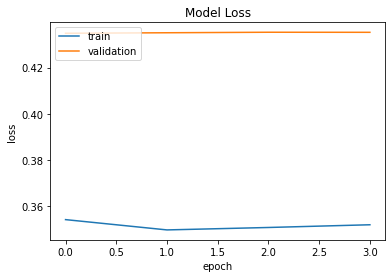

In [26]:
learner.plot('loss')

In [27]:
learner.validate()

124/124 [==============================] - 28s 204ms/step
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       972
           1       0.94      0.91      0.93       996
           2       0.87      0.75      0.81      1091
           3       0.75      0.89      0.81       906

    accuracy                           0.83      3965
   macro avg       0.84      0.84      0.83      3965
weighted avg       0.84      0.83      0.83      3965



array([[760,  23,  71, 118],
       [ 43, 911,  21,  21],
       [110,  23, 822, 136],
       [ 54,  16,  27, 809]])

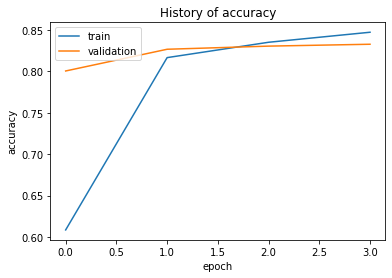

In [22]:
learner.plot('accuracy')

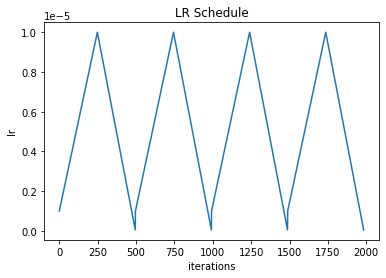

In [23]:
learner.plot('lr')